# HW2-task2

### 라이브러리 import 및 설정

In [1]:
import csv
import pylab as plt
import numpy as np

### csv에서 data 가져오기

In [2]:
x = []
x_list = []
y = []
y_list = []

f = open('hw2_data.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)

i = 0
for line in rdr:
    x.append([float(line[0])])
    x_list.append(float(line[0]))
    y.append([float(line[1])])
    y_list.append(float(line[1]))
    i += 1
f.close()

x = np.array(x).T
y = np.array(y).T

### 데이터 분포 확인

In [3]:
print("# of x data: ", len(x_list), " # of y data: ", len(y_list))
print("max(x):", max(x_list), "min(x):", min(x_list))
print("max(y):", max(y_list), "min(y):", min(y_list))

# of x data:  5000  # of y data:  5000
max(x): 4.999333569 min(x): -4.996034381
max(y): 1.036138896 min(y): -1.045201682


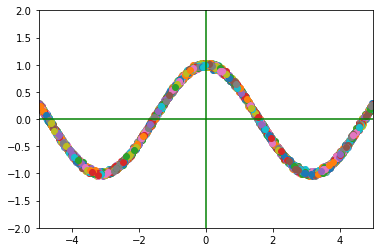

In [4]:
plt.plot(x,y,'o')
plt.xlim([-5,5]); plt.ylim([-2,2])
plt.axvline(x=0, c='g'); plt.axhline(y=0, c='g')
plt.show()

### Multi-Layer Perceptron Training

In [5]:
#activation functions
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def de_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def identity(x):
    return x

def de_identity(x):
    return 1

#number of input nodes and output nodes
inputNode = 5000
outputNode = 5000

#number of hidden nodes
hiddenNode = 5

#hidden weight
hidden_w = np.random.rand(inputNode,hiddenNode)
#output weight
output_w = np.random.rand(hiddenNode,outputNode)
#learning rate
alpha = 0.1

#training
for i in range(10000):
    hidden_z = np.dot(x, hidden_w)
    hidden_a = sigmoid(hidden_z)

    output_z = np.dot(hidden_a, output_w)
    output_a = identity(output_z)

    #backpropagation
    output_delta = (y - output_a) * de_identity(output_z)
    hidden_delta = output_delta.dot(output_w.T) * de_sigmoid(hidden_z)

    #update weight
    output_w += alpha * hidden_a.T.dot(output_delta)
    hidden_w += alpha * x.T.dot(hidden_delta)
    
print("\n\nFinal hidden_weight: \n", hidden_w)    
print("\nFinal output_weight: \n", output_w)

print("\n\nOutput: ", output_a.T)



Final hidden_weight: 
 [[0.86843686 0.51174814 0.3513503  0.13050454 0.26677659]
 [0.92163428 0.77841137 0.83369363 0.27099887 0.5240879 ]
 [0.55770467 0.8655388  0.63981945 0.21019992 0.38115156]
 ...
 [0.60529516 0.96801732 0.54472245 0.98090407 0.55608448]
 [0.13770248 0.55074366 0.81092281 0.03486399 0.99518656]
 [0.61312985 0.41760062 0.0349262  0.02008552 0.92832474]]

Final output_weight: 
 [[ 0.66339606  0.97761498  0.32790495 ...  0.8948931   0.1032612
   0.93131931]
 [-0.53785365 -0.21832826  0.92357278 ... -0.0936164   0.24354762
   0.48717343]
 [ 0.73997383  0.56509349  0.67500477 ...  0.12503371  0.57462378
   0.3919409 ]
 [-0.43589667 -0.52739011  0.02570208 ...  0.07530823 -0.31395307
   0.47443905]
 [ 0.17713716  0.28993939  0.01984011 ...  0.57170365  0.93773303
   0.70623496]]


Output:  [[-0.97375032]
 [-0.74571837]
 [ 0.94927486]
 ...
 [-0.01830818]
 [-0.07040545]
 [ 0.96161248]]


### Training 결과 확인

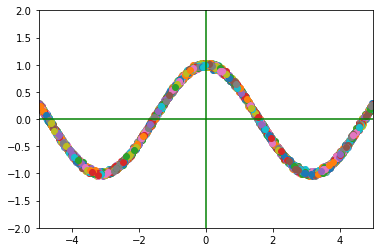

In [6]:
plt.plot(x,output_a,'o')
plt.xlim([-5,5]); plt.ylim([-2,2])
plt.axvline(x=0, c='g'); plt.axhline(y=0, c='g')
plt.show()